### A brief introduction to regression

#### Linear regression


As mentioned above, regression is commonly used to predict the value of one numerical variable from that of another. For example, below we perform a linear regression on Boston housing data: in this case, the independent variable (x-axis) is the number of rooms and the dependent variable (y-axis) is the price. 

How does such a regression work? In brief, the mechanics are as follows: we wish to fit a model $y = ax + b$ to the data $(x_i,y_i)$, that is, we want to find the optimal $a$ and $b$, given the data. In the ordinary least squares (OLS, by far the most common) formulation, there is an assumption that the error will occur in the dependent variable. For this reason, the optimal $a$ and $b$ are found by minimizing
$$SSE = \sum_i (y_i - (ax_i + b))^2$$
and this optimization is commonly achieved using an algorithm known as gradient descent. Here we perform a simple linear regression of the Boston housing data:

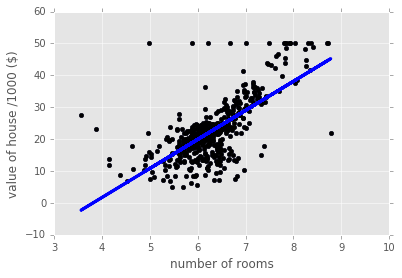

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np
boston = datasets.load_boston()
yb = boston.target.reshape(-1, 1)
Xb = boston['data'][:,5].reshape(-1, 1)
plt.scatter(Xb,yb)
plt.ylabel('value of house /1000 ($)')
plt.xlabel('number of rooms')
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit( Xb, yb)
# Plot outputs
plt.scatter(Xb, yb,  color='black')
plt.plot(Xb, regr.predict(Xb), color='blue',
         linewidth=3)
plt.show()

This regression captures the general increasing trend of the data but not much more. We have used only one predictor variable and could have used many more, in which case we would have $n$ coefficients $a_1,\ldots,a_n$ in the model, one for each predictor variable. It is worth noting that the magnitude of the variable $a_i$ tells us how strongly the corresponding variable is correlated with the target variable. 

#### Logistic regression

Regression can also be used for classification problems. The first natural example of this is **logistic regression**. In binary classifation (two labels), we can think of the labels as 0 & 1. Once again denoting the predictor variable as $x$, the logistic regression model is given by the logistic function
$$F(x) = \frac{1}{1+e^{-(ax+b)}}.$$
This is a sigmoidal (S-shaped) curved and you can see an example below. For any given $x$, if $F(x) <0.5$, then the logistic model predicts y = 0 and, alternatively, if $F(X) > 0.5$ the model predicts $y = 1$. Once again, in case we have more than one predictor variable, we also have $n$ coefficients $a_1,\ldots,a_n$, one for each predictor variable. In this case, the magnitude of the variable $a_i$ tells us how strongly the corresponding variable effects the predictor variable.

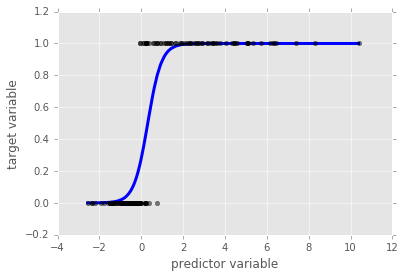

In [5]:
# Synthesize data
X1 = np.random.normal(size=150)
y1 = (X1 > 0).astype(np.float)
X1[X1 > 0] *= 4
X1 += .3 * np.random.normal(size=150)
X1= X1.reshape(-1, 1)
# run the classifier
clf = linear_model.LogisticRegression()
clf.fit(X1, y1)

X1_ordered = np.sort(X1 , axis = 0)
# and plot the result
plt.scatter(X1.ravel(), y1, color='black', zorder=20 , alpha = 0.5)
plt.plot(X1_ordered, clf.predict_proba(X1_ordered)[:,1], color='blue' , linewidth = 3)
plt.ylabel('target variable')
plt.xlabel('predictor variable')
plt.show()

### Logistic regression on the wine dataset

Now we've seen the mechanics of logistic regression, let's implement a logistic regression classifier on our delicious wine dataset:

In [9]:
# import necessary modules
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
# split data into test/train

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')

X = df.drop('quality' , 1).values #drop target variable
y1 = df['quality'].values
y = y1 <= 5 # is the rating <= 5?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#initial logistic regression model
lr = linear_model.LogisticRegression()
# fit the model
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for test set: %f' % lr.score(X_test, y_test))
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression score for test set: 0.740625
Logistic Regression score for training set: 0.752932
             precision    recall  f1-score   support

      False       0.78      0.74      0.76       179
       True       0.69      0.74      0.71       141

avg / total       0.74      0.74      0.74       320



Out of the box, this logistic regression performs better than K-NN (with scaling). Lets now scale our data and perform logistic regression:

In [11]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
print('Scaled Logistic Regression score for training set: %f' % lr_2.score(Xs_train, y_train))
y_true, y_pred = y_test, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.740625
Scaled Logistic Regression score for training set: 0.752150
             precision    recall  f1-score   support

      False       0.79      0.74      0.76       179
       True       0.69      0.74      0.72       141

avg / total       0.74      0.74      0.74       320



This is very interesting! The performance of logistic regression did not improve with data scaling. Why not, particularly when we saw that K-nearest neigbours performance improved substantially with scaling? The reason is that, if there predictor variables with large ranges that do not effect the target variable, a regression algorithm will make the corrsponding coefficients $a_i$ small so that they do not effect predictions so much. K-nearest neighbours does not have such an inbuilt strategy and so we very much needed to scale the data.